<a href="https://colab.research.google.com/github/mbarragan744/clase-IA/blob/main/corte2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##<font color="red">KNN

TAMBIEN LLAMADA MODELO LAZY, porque como tal no es un modelo sino un calculo de distancias

Algoritmo de clasificacion supervisada que se basa en la distancia entre los puntos (vecinos cercanos)

Memoriza el conjunto de entrenamiento completo y realiza predicciones basandose en una comparacion directa de la proximidad entre los puntos de prueba y los puntos de entrenamiento.

Distancias que se pueden usar:
1. Euclidiana (mas común)
2. Manhattan
3. Minkowski

#<font color="red">Ventajas y Desventajas

**Ventajas:**

* Simplicidad: Es fácil de entender e implementar.

* No paramétrico: No requiere suposiciones sobre la distribución de los datos, lo que lo hace adecuado para problemas donde no se conocen las distribuciones.

* Eficaz para problemas de clasificación pequeños o moderados: Funciona bien cuando hay un conjunto de datos pequeño y bien distribuido.

**Desventajas:**

* Alto costo computacional: A medida que crece el tamaño del conjunto de datos, el tiempo de predicción aumenta, ya que debe calcularse la distancia entre el punto de prueba y todos los puntos de entrenamiento.

* Dependencia de la elección de K: El rendimiento del modelo depende de la elección de "K" (el número de vecinos). Un valor muy bajo puede resultar en sobreajuste, mientras que un valor muy alto puede llevar a un modelo subajustado.

* Sensibilidad a los valores atípicos: Los valores atípicos pueden afectar negativamente las predicciones si no se manejan adecuadamente.



<font color="red">Es obligatorio normalizar los datos, manejo de outlier, manejo de codificacion

k->numero de features

https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html


##<font color="red">CLASIFICACION DE KNN

PASOS A SEGUIR:



In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Crear el conjunto de datos
data = {
    "Horas de Estudio": [
        "Alta", "Baja", "Baja", "Alta", "Alta",
        "Media", "Media", "Alta", "Baja", "Media",
        "Alta", "Baja", "Baja", "Media", "Alta",
        "Media", "Alta", "Baja", "Media", "Baja"
    ],
    "Asistencia": [
        "Buena", "Buena", "Mala", "Mala", "Buena",
        "Buena", "Mala", "Buena", "Mala", "Buena",
        "Mala", "Buena", "Mala", "Buena", "Buena",
        "Mala", "Mala", "Buena", "Buena", "Mala"
    ],
    "Resultado": [
        "Sí", "No", "No", "Sí", "Sí",
        "No", "Sí", "Sí", "No", "Sí",
        "No", "No", "Sí", "No", "Sí",
        "No", "Sí", "No", "Sí", "No"
    ]
}


df = pd.DataFrame(data)

df

,Horas de Estudio,Asistencia,Resultado
0,Alta,Buena,Sí
1,Baja,Buena,No
2,Baja,Mala,No
3,Alta,Mala,Sí
4,Alta,Buena,Sí
5,Media,Buena,No
6,Media,Mala,Sí
7,Alta,Buena,Sí
8,Baja,Mala,No
9,Media,Buena,Sí


In [ ]:
# Codificar variables categóricas a numéricas, cuando es binarios se puede utilizar cualquiera de encoder
encoder = LabelEncoder()
df_encoded = df.apply(encoder.fit_transform)

# Separar características y etiqueta
X = df_encoded[["Horas de Estudio", "Asistencia"]]
y = df_encoded["Resultado"]

X

,Horas de Estudio,Asistencia
0,0,0
1,1,0
2,1,1
3,0,1
4,0,0
5,2,0
6,2,1
7,0,0
8,1,1
9,2,0


In [ ]:
# Ver la equivalencia de las categorías originales a los valores numéricos
print("\nEquivalencia de categorías originales:")
for column in df.columns:
    print(f"{column}: {dict(zip(encoder.classes_, range(len(encoder.classes_))))}")


Equivalencia de categorías originales:
Horas de Estudio: {'No': 0, 'Sí': 1}
Asistencia: {'No': 0, 'Sí': 1}
Resultado: {'No': 0, 'Sí': 1}


stratify=y  extraer los datos de manera aleatoria igual que la etiqueta

In [ ]:
# Dividir en conjunto de entrenamiento y prueba con estratificación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
X_test

,Horas de Estudio,Asistencia
13,2,0
8,1,1
4,0,0
12,1,1


In [ ]:
X_train

,Horas de Estudio,Asistencia
19,1,1
11,1,0
0,0,0
7,0,0
3,0,1
6,2,1
16,0,1
1,1,0
17,1,0
18,2,0


<font color="red">Cuando toca hacer varios modelos, lo mejor es usar gridsearch

In [ ]:
# Entrenar el modelo KNN con K=3      hacer por lo menos 20 modelos
#Este valor de K fue arbitrario por el ejercicio
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

# Hacer predicciones
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, 0])

In [ ]:
y_test.to_numpy()

array([0, 0, 1, 1])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.75


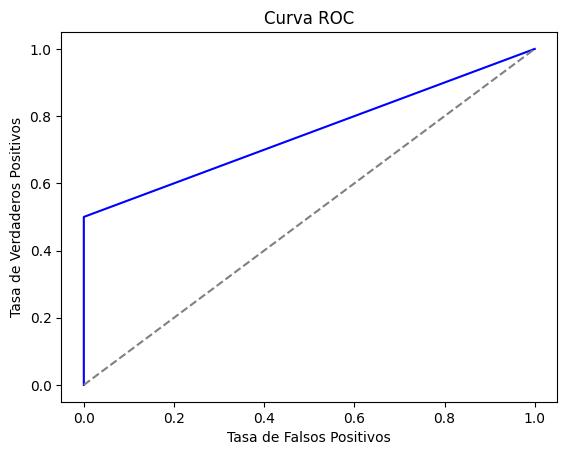

Precisión del modelo: 0.75
Matriz de confusión:
 [[2 0]
 [1 1]]
Área bajo la curva ROC: 0.75


In [ ]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Manejar el cálculo de ROC AUC solo si ambas clases están presentes
if len(set(y_test)) > 1:
    roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])
    fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, color='blue')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.title('Curva ROC')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.show()
else:
    roc_auc = None
    print("Advertencia: El cálculo del AUC no es posible porque solo hay una clase en el conjunto de prueba.")

# Imprimir los resultados
print("Precisión del modelo:", accuracy)
print("Matriz de confusión:\n", conf_matrix)
if roc_auc is not None:
    print("Área bajo la curva ROC:", roc_auc)

lo mejor seria que fuera asintotica a la tasa de verdaderos positivos y poco a la tasa de falsos positivos


si es lineal, practicamente seria 50/50, si es por debajo de esa linea no predice nada

entre mayor area bajo la curva, es mejor

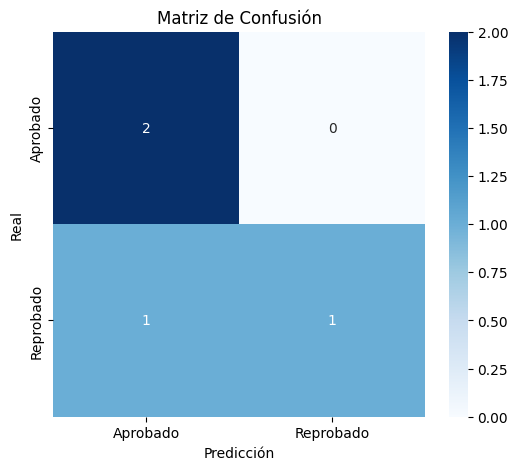

In [ ]:
import seaborn as sns
# Graficar la matriz de confusión
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Aprobado", "Reprobado"], yticklabels=["Aprobado", "Reprobado"])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

#<font color="red"> CLASE 2
arboles de decision

##<font color="green">NINGUN PROYECTO DEBE HACERSE CON ARBOLES DE DECISIONES
sin embargo, se puede utilizar ramdom forest, Extreme Gradient Boosting (XGBoost) es el mejor de todos

un nodo impuro es cuando tiene mas de una clase, es decir, si hay las opciones de si y no, es un nodo impuro, si fuera solamente si o solamente no, seria un nodo puro, un nodo puro recibe de nombre de nodo terminal o nodo leat.

Los árboles de decisión pueden mejorar su desempeño mediante métodos como Random Forest y Gradient Boosting, estos combinan múltiples árboles para reducir el sobreajuste (overfitting) y mejorar la generalización del modelo, llamados modelos ensamblados.

algoritmos de caja blanca y algoritmos de caja negra: arboles de decisión

los arboles de decision no son lineales


* un arbol de decision clasifica una obaservacion siguiendo una serie de divisiones binarias basadas en las caracteristicas de la muestra. el arbol comienza en un nodo raiz, donde se evaluan las caracteristicas de los datos. a partir de ahi, las obaservaciones se dividen en diferentes ramas segun las condiciones especificas establecidas para cada caracteristica. este proceso continua hasta llefar a un nodo terminal, que es el que asigna una clase a la observacion.

#metodos para selecionar las divisiones:

* **gini impurity:** mide la impureza de un nodo. cuanto menor sea la impureza, mas homogenea sera la clase de ese nodo.
* **entropía (cruzada de shannon):** mide la cantidad de desorden o incertidumbre en una division. la idea es reducir la entropia de un conjunto de datos mediante la division en nodos mas homogeneos.
* logaritmo de la perdida
* **indice de gini vs entropía:** ambos criterios se utilizan para elegir el mejor punto de corte, aunque el indice de gini es mas popular debido a su simplicidad y rapidez computacional. sin embargo, la entropia tiende a ser mas informativa en divisiones con muchas clases.


### <font color="blue">11.2.2 Ventajas de los árboles de decisión para clasificación
* Interpretabilidad: Los árboles de decisión son modelos muy fáciles de interpretar y visualizar. Cada nodo y rama representan una regla de decisión que puede explicarse fácilmente.
* No requieren normalización de los datos: A diferencia de otros modelos como las máquinas de soporte vectorial (SVM) o las regresiones lineales, los árboles de decisión no requieren que los datos sean normalizados o estandarizados.
* Manejo de datos categóricos y numéricos: Los árboles pueden manejar tanto variables numéricas como categóricas sin necesidad de transformarlas (por ejemplo, a variables dummy).
* Resistencia a los valores atípicos: Los árboles no se ven muy afectados por outliers, ya que los puntos extremos no suelen influir en el valor de la división.
* Automática selección de variables importantes: Los árboles de decisión pueden identificar qué variables son más relevantes para la clasificación.

### <font color="blue">11.2.3 Desventajas de los árboles de decisión para clasificación
* Overfitting: Los árboles de decisión tienden a sobreajustarse a los datos de entrenamiento, especialmente cuando se permiten árboles muy profundos. Esto se debe a que pueden aprender detalles muy específicos que no generalizan bien a nuevos datos.
* Inestabilidad: Un pequeño cambio en los datos de entrenamiento puede llevar a una estructura de árbol completamente diferente.
* Modelo sesgado en clases desbalanceadas: Si los datos están desbalanceados, el árbol puede predecir predominantemente la clase mayoritaria.


#### <font color="blue">11.2.4 Estrategias para evitar el overfitting
Existen varias técnicas que se pueden aplicar para reducir el sobreajuste en árboles de decisión:
* Poda (Pruning): La poda elimina ramas del árbol que tienen poca importancia o que sobreajustan los datos. Se pueden usar métodos como el Cost Complexity Pruning para realizar una poda que elimine ramas que no mejoren significativamente la precisión del modelo.
* Limitación de la profundidad del árbol: Limitar la profundidad máxima del árbol es una forma sencilla de evitar que el árbol crezca demasiado, lo que podría llevar a un sobreajuste.
* Mínimo número de muestras por hoja: Establecer un número mínimo de observaciones para permitir una división en cada nodo o para que un nodo sea terminal puede ayudar a evitar divisiones demasiado específicas.
* Métodos de ensamblaje: Técnicas como Random Forest y Gradient Boosting combinan múltiples árboles de decisión para mejorar la robustez y reducir el riesgo de sobreajuste.






